# Sweep graphs
Revive the babies

# OVERALL FINDINGS

Trends combining PSO parameters: 
- c_1 and c_2 yes, better when their sum is smaller than 4
- number of particles and omega: best range for omega between 0.4 and 0.8 for this range of number of particles
- c_2 and omega: best when 0.6 < omega < 0.9 and 0 < c_2 < 2.5

Trends combining NN hyperparameters and PSO parameters:
- Number of particles and number of neurons per layer: no obvious trend in the range tested, they are not signficant around the best parameter set
- Number of hidden layers and number of particles: can reach low validation loss for number of particles > 10 for 1 hidden layer, then more and more particles are needed as you increase the number of hidden layers to get a good validation loss
- Number of neurons per layer and omega: best range for 0.4 < omega < 0.8 for 10 neurons per layer, the range decreases to 0.6 < omega < 0.8 for 20 neurons per layer. 


In [2]:
import pandas as pd
# import geopandas as gpd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sb

# set font sizes
import matplotlib 
SMALL_SIZE = 14
matplotlib.rc('font', size=SMALL_SIZE)
matplotlib.rc('axes', titlesize=SMALL_SIZE)

In [3]:
def get_data(sweep_name, x_label, y_label, z_label = "val_loss"):
    'Extracts relevant data from the sweep'
    
    pso_df = pd.read_csv("sweep_data/"+sweep_name+".csv")

    x = pso_df[[x_label]]
    y = pso_df[[y_label]]
    z = pso_df[[z_label]]
    
    return x, y, z

In [4]:
def plot_heatmap(z, x_range, y_range, clip_min = 0, clip_max = 1, square = True, grid_space = 6, cmap_lims = (0, 1)):
    'Plots a heatmap with the data'
    
    temp = np.array(z, dtype = 'float')
    
    z_array = np.flipud(temp.reshape((x_range[2], y_range[2])))
    
    #Choose colours for heat map
    cmap = plt.get_cmap("YlGnBu")#('bwr')

# maybe here the min and max are swapped
    heat_map = sb.heatmap(z_array.T, xticklabels=True, yticklabels=True, square = square, 
                          cmap=cmap, vmin=cmap_lims[0], vmax=cmap_lims[1], cbar_kws={'label': 'Validation Loss'},
                          mask=np.isnan(z_array.T))
    heat_map.set_facecolor('grey')
    
    # Set x ticks
    plt.xticks(ticks = np.linspace(0, x_range[2]-1, grid_space)+0.5, rotation=0)
    
    # Set x ticks labels
    heat_map.set_xticklabels(np.round(np.linspace(x_range[0], x_range[1], grid_space), 1))
    
    # Set y ticks
    plt.yticks(ticks = np.linspace(0, y_range[2]-1, grid_space)+0.5, rotation=0)
    
    # Set y ticks labels
    heat_map.set_yticklabels(np.flip(np.round(np.linspace(y_range[0], y_range[1], grid_space), 1)))
    
    plt.xlabel(x_range[3])
    plt.ylabel(y_range[3])
    
#     plt.xlim(1) # set the x limits here
    plt.show()

    
    return z_array

# Sweep 16: c_1 and c_2 against validation loss

- What we should find (cf. wandb) is that the lowest values of validation loss is found for values in the bottom left corner, i.e. when the sum of c_1 and c_2 is less or equal to 4
- The smaller the sum the better
- This agrees with findings from the literature and recommended values (c_1 + c_2 = 4)
- Some values don't converge or have outlying results: 
    - if both c_1 and c_2 = 0 then the validation loss is very large
    - mostly for midrange values of c_1 and extreme values of c_2 the search doesn't converge: explanation?
    


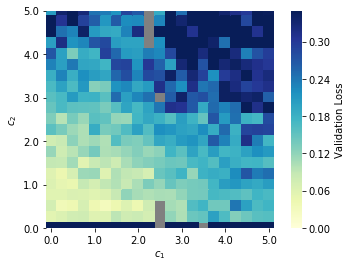

array([[2.05655438e-01, 4.24139297e-01, 3.65834471e-01, 2.01790095e-01,
        2.71566037e-01, 2.31326642e-01, 1.84494967e-01, 1.68464310e-01,
        1.58576142e-01, 1.48425319e-01, 1.32412578e-01, 1.55950072e-01,
        7.69813587e-02, 1.16280325e-01, 8.98340876e-02, 6.02459533e-02,
        6.31305108e-02, 5.98691029e-02, 7.49697402e-02, 5.72802668e-02,
        9.51625997e+01],
       [3.35768759e-01, 3.07152675e-01, 2.47157403e-01, 3.18045888e-01,
        2.00205388e-01, 2.01390315e-01, 2.29994055e-01, 1.98748524e-01,
        1.70546974e-01, 1.69431911e-01, 9.80757564e-02, 1.36643352e-01,
        8.50730459e-02, 7.98296899e-02, 8.78636012e-02, 4.61815561e-02,
        5.31516197e-02, 5.89995046e-02, 3.63221029e-02, 6.46113088e-02,
        8.58537300e-01],
       [3.75014166e-01, 3.81171771e-01, 2.31018798e-01, 2.16083442e-01,
        1.32728021e-01, 2.40241599e-01, 1.84398023e-01, 1.68067646e-01,
        2.07697185e-01, 1.55843258e-01, 1.36358382e-01, 1.14817784e-01,
        1.2309

In [5]:
x, y, z = get_data('pso_16', "c_1", "c_2")

plot_heatmap(z, x_range = (0, 5, 21, "$c_1$"), y_range = (0, 5, 21, "$c_2$"), cmap_lims = (0, 0.35))

# Sweep 17: number of particles and number of neurons per layer

- Issues with the graph (not the same as wandb)

Considering wandb results

- no obvious correlation, hard to see a pattern
- mostly low values of validation loss: the problem is quite simple and the other parameters are optimised enough that these don't really make a difference

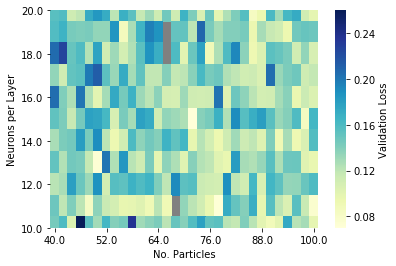

array([[0.15553675, 0.15843313, 0.20632536, 0.13459933, 0.20566623,
        0.15247941, 0.12781269, 0.15224649, 0.12211082, 0.14800281,
        0.14447501],
       [0.15906061, 0.16718453, 0.22666342, 0.11236669, 0.14081837,
        0.14261228, 0.14231284, 0.12475479, 0.12779591, 0.12004225,
        0.16031442],
       [0.11377062, 0.14382715, 0.15086952, 0.15225821, 0.12635815,
        0.11684764, 0.14591837, 0.14635027, 0.1792236 , 0.14079391,
        0.10532207],
       [0.11978953, 0.1417003 , 0.15935922, 0.15471409, 0.20188646,
        0.14537206, 0.18127349, 0.14299413, 0.14939037, 0.1211573 ,
        0.26577361],
       [0.17178081, 0.14293035, 0.12357814, 0.19954231, 0.12648442,
        0.17846069, 0.14333172, 0.11764553, 0.13173181, 0.08303362,
        0.15352576],
       [0.18409303, 0.13529288, 0.17737155, 0.21270654, 0.10036643,
        0.17610303, 0.18953148, 0.07341931, 0.18781361, 0.13625687,
        0.12997321],
       [0.17159505, 0.13529467, 0.1121543 , 0.15446045, 0.

In [6]:
x, y, z = get_data('pso_17', "num_particles", "num_per_layer")
# print(x, y, z)

plot_heatmap(z, x_range = (40, 100, 31, "No. Particles"), y_range = (10, 20, 11, "Neurons per Layer"), square = False, cmap_lims = (0.07, 0.26))

# Sweep 18: number of hidden layers and number of particles

Again the validation loss seems to be swapped compared to wandb

Looking at wandb results:

- The more hidden layers you have the most particles you need to get a low validation loss
- This could be because the problem is quite simple so when you have too many hidden layers, you risk overfitting the data
- This overfitting can be overcome if a large number of particles are used in the PSO
- For one hidden layer, validation loss becomes independent of the number of particles used in the PSO: it is always low
- For 100 particles in the PSO the validation loss becomes independent of the number of hidden layers: it is always low


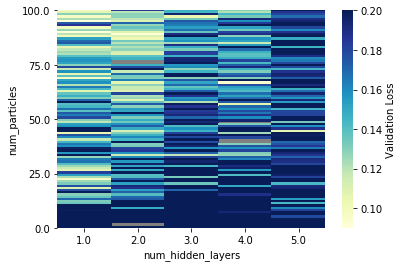

array([[ 0.09885576,  0.10706023,  0.12918897,  0.09780061,  0.12300447,
         0.08818686,  0.17336598,  0.18622567,  0.09978662,  0.12722132,
         0.08915258,  0.12001102,  0.1003656 ,  0.15276968,  0.16954301,
         0.17389161,  0.14166379,  0.1066338 ,  0.1189182 ,  0.12607879,
         0.12224504,  0.14008731,  0.15514642,  0.15732947,  0.15181202,
         0.1287668 ,  0.17907947,  0.11707824,  0.15816785,  0.10560638,
         0.13894851,  0.09730542,  0.15025823,  0.15860965,  0.12167221,
         0.1648794 ,  0.14250856,  0.10761264,  0.13706843,  0.14686783,
         0.1304332 ,  0.17079322,  0.23670094,  0.14007426,  0.14486889,
         0.16789294,  0.13932002,  0.17394133,  0.16414227,  0.17952143,
         0.12997321,  0.11889025,  0.15352576,  0.1575674 ,  0.26577361,
         0.24925113,  0.10532207,  0.17604869,  0.16031442,  0.1186571 ,
         0.14447501,  0.16630213,  0.15859515,  0.19758761,  0.21218245,
         0.15598682,  0.20383689,  0.12630993,  0.1

In [7]:
x, y, z = get_data('pso_18', "num_hidden_layers", "num_particles")

plot_heatmap(z, x_range = (1,5,5, "num_hidden_layers"), y_range = (0,100,100, "num_particles"), square = False, grid_space = 5, cmap_lims = (0.09, 0.2))

# Sweep 19: number of particles and inertia omega

This one seems good, maybe a bit shifted compared to wandb (could be a optical effect)
- On wandb it seems like the best range is 0.4<omega<0.8
- Here it seems like the best range is 0.1 < omega < 0.6


- Either way, the validation loss seems independent of the number of particles, and a best range appears for omega. 
- The second graph is a great visualisation of this with very evident U-shaped curves of validation loss versus omega. 

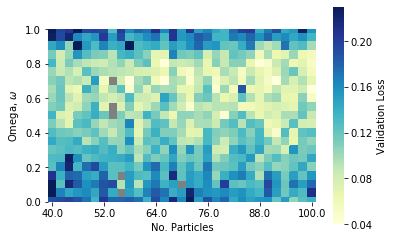

In [8]:
x, y, z = get_data('pso_19',"num_particles", "omega")

z_array = plot_heatmap(z, x_range = (40,100,31, "No. Particles"), y_range = (0,1,21, "Omega, $\omega$"), cmap_lims = (0.04, 0.23))

[0.18360156 0.15854773 0.1364387  0.11727445 0.10105499 0.08778033
 0.07745045 0.07006536 0.06562506 0.06412954 0.06557882 0.06997289
 0.07731175 0.08759539 0.10082383 0.11699705 0.13611506 0.15817787
 0.18318546 0.21113784 0.24203501]


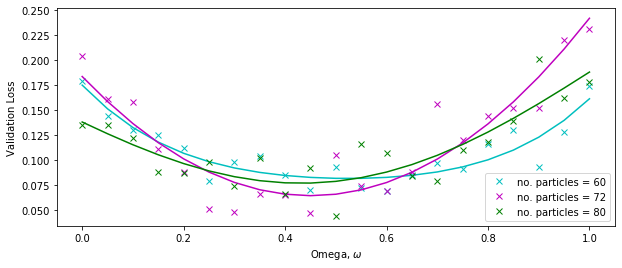

In [9]:
omega_range = np.linspace(0, 1, 21)

plt.figure(figsize = [10, 4])

plt.plot(omega_range, z_array[10, :], 'cx', label = "no. particles = "+str(np.unique(np.array(x))[10]))
p1 = np.poly1d(np.polyfit(omega_range, z_array[10, :], 4))
plt.plot(omega_range, p1(omega_range),'c-')

plt.plot(omega_range, z_array[16, :], 'mx', label = "no. particles = "+str(np.unique(np.array(x))[16]))
p2 = np.poly1d(np.polyfit(omega_range, z_array[16, :], 2))
plt.plot(omega_range, p2(omega_range), 'm-')
print(p2(omega_range))

plt.plot(omega_range, z_array[20, :], 'gx', label = "no. particles = "+str(np.unique(np.array(x))[20]))
p3 = np.poly1d(np.polyfit(omega_range, z_array[20, :], 4))
plt.plot(omega_range, p3(omega_range), 'g-')

plt.ylabel("Validation Loss")
plt.xlabel("Omega, $\omega$")
plt.legend()

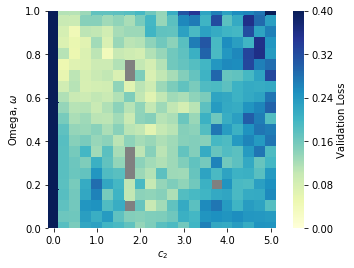

In [10]:
x, y, z = get_data('pso_20',"c_2", "omega")
# print(x, y, z)

z_array = plot_heatmap(z, x_range = (0, 5, 21, "$c_2$"), y_range = (0,1,21, "Omega, $\omega$"), cmap_lims = (0, 0.4))

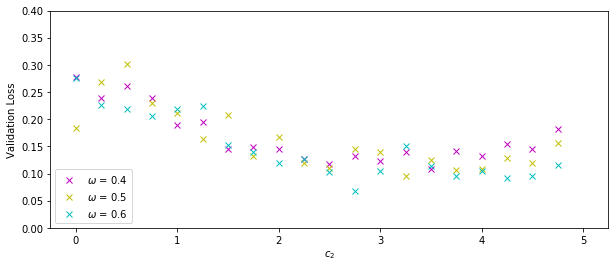

In [31]:
c2_range = np.linspace(0, 5, 21)

plt.figure(figsize = [10, 4])

plt.plot(c2_range, z_array[:, 8], 'mx', label = "$\omega$ = "+str(np.unique(np.array(y))[8]))
# p1, residuals, rank, singular_values, rcond =np.polyfit(c2_range, z_array[:, 8], 2, full = True)
# print(residuals, rank, singular_values, rcond)
# p1 =  np.poly1d(p1)
# plt.plot(c2_range, p1(c2_range), 'm-')

plt.plot(c2_range, z_array[:, 10], 'yx', label = "$\omega$ = "+str(np.unique(np.array(y))[10]))
# p2 = np.poly1d(np.polyfit(c2_range, z_array[:, 10], 2))
# plt.plot(c2_range, p2(c2_range), 'g-')

plt.plot(c2_range, z_array[:, 12], 'cx', label = "$\omega$ = "+str(np.unique(np.array(y))[12]))
# p3 = np.poly1d(np.polyfit(c2_range, z_array[:, 12], 2))
# plt.plot(c2_range, p3(c2_range), 'c-')

plt.ylabel("Validation Loss")
plt.xlabel("$c_2$")
plt.ylim(0, 0.4)
plt.legend()

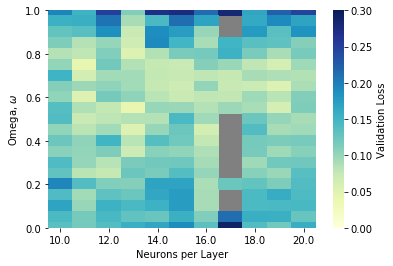

array([[0.19670582, 0.155742  , 0.12997321, 0.11341765, 0.08480115,
        0.10288194, 0.15124684, 0.10917859, 0.10427041, 0.13824643,
        0.14034624, 0.1037408 , 0.12369717, 0.10768826, 0.14108655,
        0.13024055, 0.1945661 , 0.14160862, 0.16941397, 0.14407995,
        0.13529269],
       [0.15250963, 0.15785209, 0.13625687, 0.08496717, 0.07965096,
        0.04345506, 0.06434495, 0.09784731, 0.05413403, 0.08770193,
        0.072888  , 0.08130603, 0.10542327, 0.10277474, 0.10144615,
        0.08097227, 0.13991864, 0.09448833, 0.10029819, 0.11744169,
        0.11862163],
       [0.25220086, 0.20941747, 0.18781361, 0.1014685 , 0.11201342,
        0.11981368, 0.093819  , 0.10537694, 0.1182056 , 0.07733466,
        0.08025749, 0.09399373, 0.15063668, 0.11284687, 0.08394866,
        0.07599902, 0.11210407, 0.13178444, 0.15356513, 0.14587483,
        0.13863779],
       [0.11130604, 0.09141562, 0.07341931, 0.06857011, 0.05433461,
        0.08577465, 0.09486707, 0.09393526, 0.1054109

In [11]:
x, y, z = get_data('pso_21',"num_per_layer", "omega")
# print(x, y, z)

plot_heatmap(z, x_range = (10, 20, 11, "Neurons per Layer"), y_range = (0,1,21, "Omega, $\omega$"), square = False, cmap_lims = (0, 0.3))